In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns; sns.set()

In [31]:
X,y = make_blobs(n_samples=300, centers=4, random_state=0)

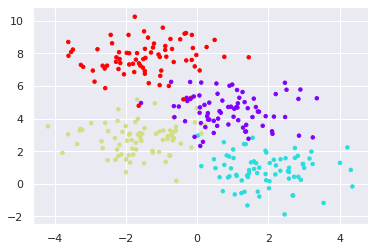

In [32]:
plt.scatter(X[:,0], X[:,1], c=y, s=12, cmap='rainbow')

In [33]:
def visualize_tree(model, X,y, ax=None, cmap="rainbow"):

  ax=ax or plt.gca()

  ax.scatter(X[:,0], X[:,1], c=y, s=30,cmap=cmap, clim=(y.min(),y.max()), zorder=3)
  ax.axis('tight')
  ax.axis('off')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  model.fit(X,y)

  xx,yy  =np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num =200))
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

  n_classes = len(np.unique(y)) 
  contours = ax.contourf(xx,yy,Z, alpha=0.3,
                         levels= np.arange(n_classes +1)-0.5,
                         cmap=cmap, clim=(y.min(), y.max()), zorder=1)
  ax.set(xlim=xlim,ylim=ylim) 

In [34]:
tree = (DecisionTreeClassifier(), X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'clim'


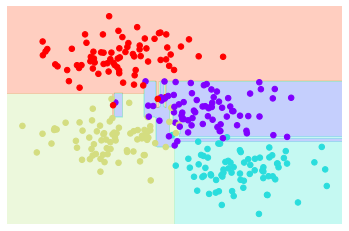

In [35]:
visualize_tree(DecisionTreeClassifier(), X, y)

In [36]:
tree = DecisionTreeClassifier()

In [37]:
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state = 1)

In [38]:
bag.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, random_state=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'clim'


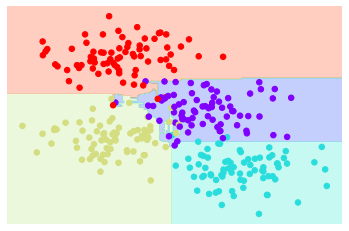

In [39]:
visualize_tree(bag, X, y)

In [40]:
y_hat = bag.predict(X)

In [41]:
np.mean(y==y_hat)

0.9966666666666667

In [42]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

In [43]:
model.fit(X,y)

RandomForestClassifier(random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'clim'


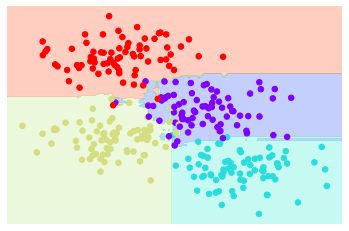

In [44]:
visualize_tree(model, X,y)

In [54]:
importances = model.feature_importances_
importances

array([0.36592094, 0.63407906])

In [51]:
std=np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

In [46]:
forest_importances = pd.Series(importances)

<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

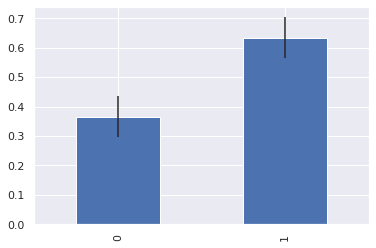

In [52]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
fig.tight_layout